In [1]:
import train as train
import generate
import eval
from modules.config import read_config
import modules.plots as plots
import torch
import numpy as np
import os

In [2]:
BASE_DIR = "./experiments/pipeline-test"
PROFILE = "sin-10x-mcmc"

In [3]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

In [4]:
config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]

In [5]:
GENERATE = True
TRAIN = True
EVAL = True

IS_ONE_DIM = False

In [6]:
if GENERATE:
    if not os.path.exists(f"{BASE_DIR}/datasets"):
                os.mkdir(f"{BASE_DIR}/datasets")
    generate.gen(dataset_config, f"{BASE_DIR}/datasets")

====== Generating profile sin-10x-10k ======


In [7]:
if TRAIN:
    if not os.path.exists(f"{BASE_DIR}/models"):
        os.mkdir(f"{BASE_DIR}/models")

    train.train(config, f"{BASE_DIR}")

Using device: cpu
===== Training profile sin-10x-mcmc =====


Warmup:   0%|          | 0/1500 [00:00, ?it/s]/home/alvar/miniconda3/envs/master/lib/python3.9/site-packages/pyro/poutine/subsample_messenger.py:63: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor(0.0, device=self.device)
Warmup:  17%|█▋        | 249/1500 [14:09,  4.77s/it, step size=1.34e-03, acc. prob=0.788]

KeyboardInterrupt: 

In [ ]:
if EVAL:
    if not os.path.exists(f"{BASE_DIR}/results"):
                os.mkdir(f"{BASE_DIR}/results")
                
    eval.eval(config, dataset_config, f"{BASE_DIR}")

Loaded model and parameters from ./experiments/pipeline-test/models/sin-10x
using device: cpu
====== evaluating profile sin-10x ======


In [ ]:
# Load test samples from eval
data_samples = np.genfromtxt(f"{BASE_DIR}/results/{NAME}/samples/data_samples.csv", delimiter=",")
pred_samples = np.genfromtxt(f"{BASE_DIR}/results/{NAME}/samples/predictive_samples.csv", delimiter=",")

# Load in domain samples
data_in_domain_samples = np.genfromtxt(f"{BASE_DIR}/results/{NAME}/samples/data_in_domain_samples.csv", delimiter=",")
pred_in_domain_samples = np.genfromtxt(f"{BASE_DIR}/results/{NAME}/samples/predictive_in_domain_samples.csv", delimiter=",")

# Load out of domain samples
data_out_domain_samples = np.genfromtxt(f"{BASE_DIR}/results/{NAME}/samples/data_out_domain_samples.csv", delimiter=",")
pred_out_domain_samples = np.genfromtxt(f"{BASE_DIR}/results/{NAME}/samples/predictive_out_domain_samples.csv", delimiter=",")
pred_samples.shape

(10000, 1000)

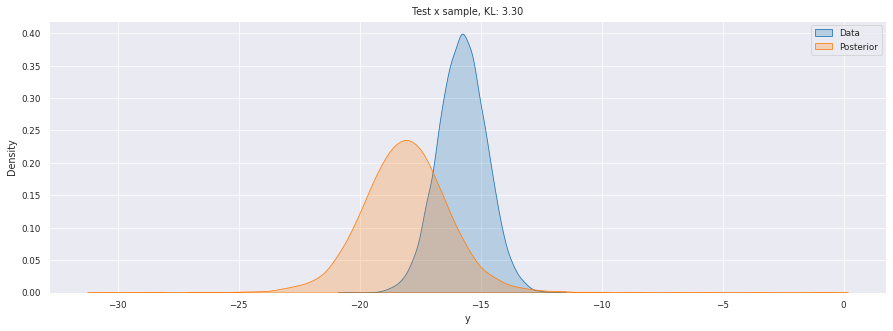

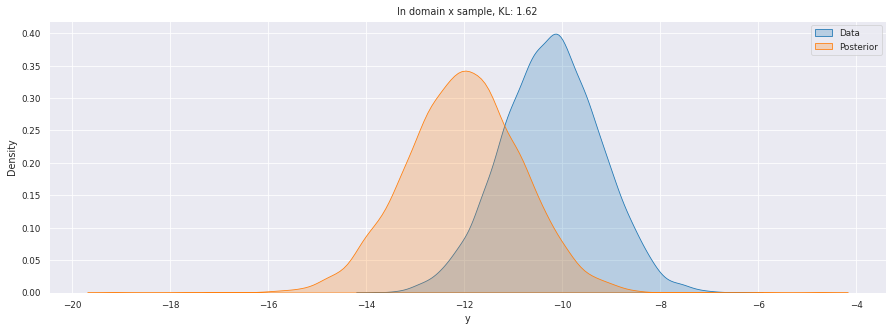

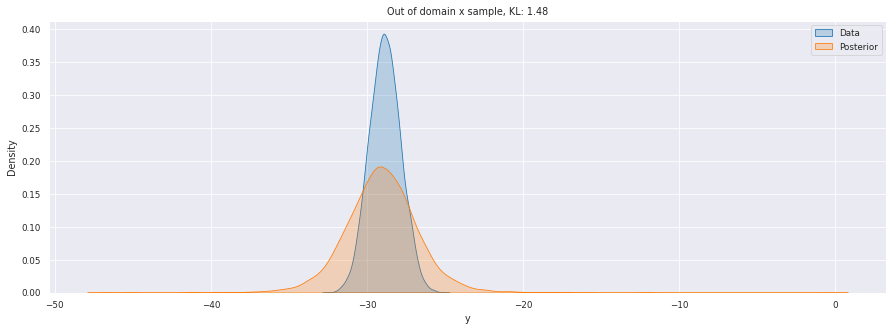

In [ ]:
from modules.metrics import KL_divergance_normal
i = 2

kl1 = KL_divergance_normal(pred_samples[:, i], data_samples[:, i])
kl2 = KL_divergance_normal(pred_in_domain_samples[:, i], data_in_domain_samples[:, i])
kl3 = KL_divergance_normal(pred_out_domain_samples[:, i], data_out_domain_samples[:, i])
plots.plot_comparison(pred_samples[:, i], data_samples[:, i], figsize=(15, 5), title=f"Test x sample, KL: {kl1:.2f}")
plots.plot_comparison(pred_in_domain_samples[:, i], data_in_domain_samples[:, i], figsize=(15, 5), title=f"In domain x sample, KL: {kl2:.2f}")
plots.plot_comparison(pred_out_domain_samples[:, i], data_out_domain_samples[:, i], figsize=(15, 5), title=f"Out of domain x sample, KL: {kl3:.2f}")